In [1]:
# Load the data
import pandas as pd
import numpy as np
data = pd.read_csv('Usa_Housing_Price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


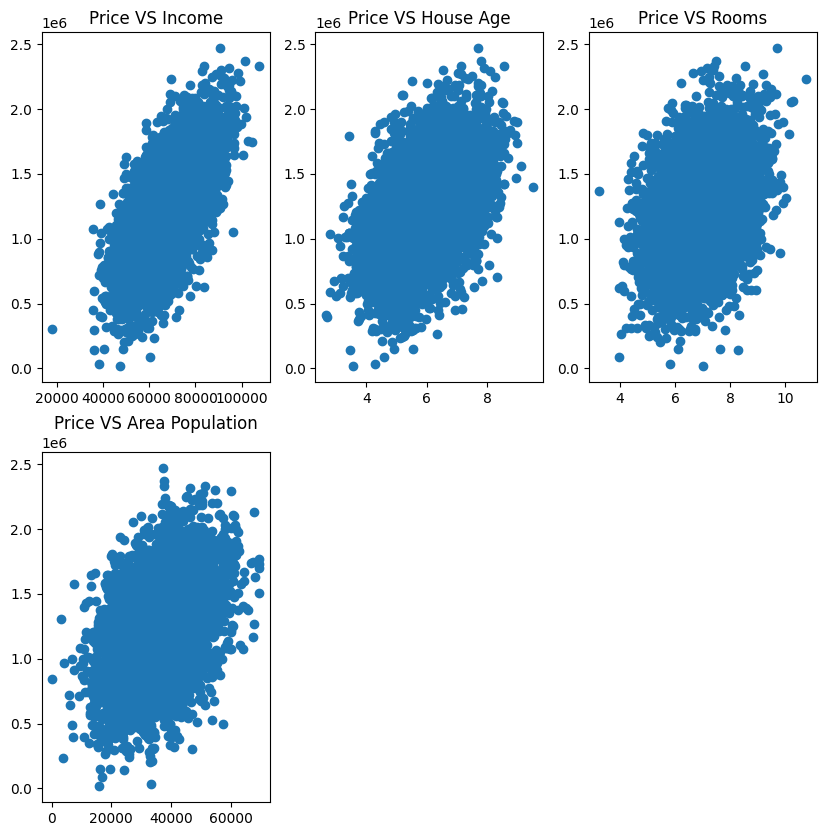

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))

fig1 = plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS Income')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'], data.loc[:,'Price'])
plt.title('Price VS House Age')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'], data.loc[:,'Price'])
plt.title('Price VS Rooms')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'], data.loc[:,'Price'])
plt.title('Price VS Area Population')
plt.show()

In [12]:
#define X and y
X = data.loc[:,'Avg. Area Income']
y = data.loc[:,'Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [13]:
# set up the linear regression model
# 也就是单因子预测（可以从结果看出不够准，是条直线）
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()

# Train the model
# first should to convert demension of X
X = np.array(X).reshape(-1,1)

LR1.fit(X,y)

LinearRegression()

In [16]:
# Calculate the price vs size
y_predict_1 = LR1.predict(X)
print(y_predict_1)

[1464424.9504096  1458133.78934377 1077429.52283635 ... 1122016.75893299
 1219741.59365632 1166948.95599714]


In [18]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error_1  = mean_squared_error(y,y_predict_1)
r2_score_1 = r2_score(y,y_predict_1)
print(mean_squared_error_1, r2_score_1)


73645940735.18942 0.4092593070338846


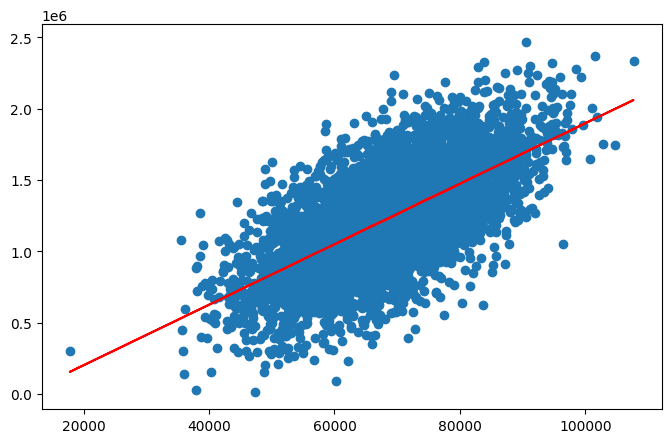

In [19]:
# Using image to display the difference
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.plot(X,y_predict_1,'r')
plt.show()

In [22]:
# 多因子
# define X_multi
X_multi = data.drop(['Price','Address'], axis=1)

# set up 2nd linear model
LR_multi = LinearRegression()
# train the model
LR_multi.fit(X_multi,y)

# make prediction
y_predict_multi = LR_multi.predict(X_multi)
print(y_predict_multi)

[1223847.04275343 1494937.69161731 1253016.74608151 ... 1020482.5260927
 1263982.82457369 1301976.34571991]


In [23]:
mean_squared_error_multi  = mean_squared_error(y,y_predict_multi)
r2_score_multi = r2_score(y,y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

10219734313.253004 0.9180238195089553


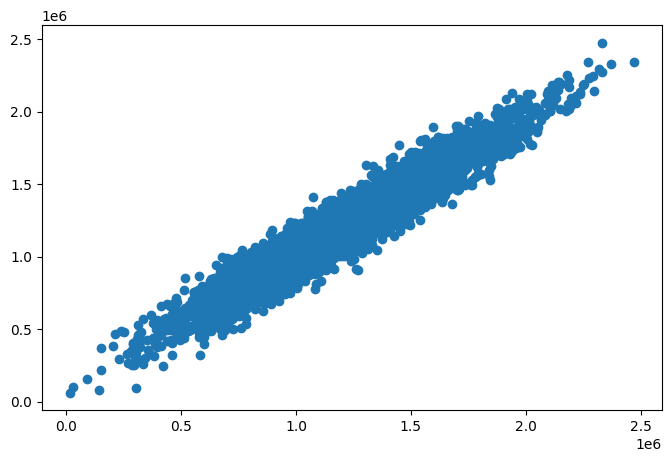

In [24]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_multi)
plt.show()
# 可以看出来，多因子的更精准

In [31]:
X_test = [65000,5,5,4,30000]
X_test = np.array(X_test).reshape(1,-1)

y_test_predict = LR_multi.predict(X_test)
print(y_test_predict)

[659385.93352856]


C:\Users\IAdmin\Software\Dev_Tools\Anaconda\envs\imooc_ai\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
